# Machine Learning & Statistics 2020 Project

### Power Production Predictions

***

### Project Brief:

 > *In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests*
 
 ***

In [1]:
# for neural networks.
import tensorflow.keras as kr
# for numerical arrays
import numpy as np
# for data frames.
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
# for test and train datasets
import sklearn.model_selection as mod

In [2]:
# Plot style.
plt.style.use("bmh")
# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

<br>

Based on analysis I have performed for a previous project [1], there are a number of outliers present in this dataset. In order to optimise the modelling fit, I will firstly remove these data points from the dataset which will be used in the model.

<br>

In [4]:
#drop the datapoints which have been identified as outliers
data = df.drop([208,340,404,456,490,491,492,493,494,495,496,497,498,499], axis=0)
# reset the indicies so they are once again sequential
data.reset_index(inplace=True)

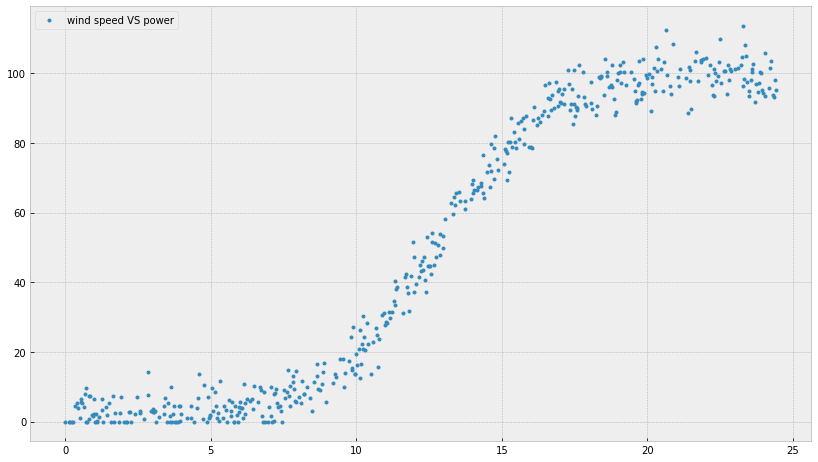

In [5]:
# plot the dataset to get an idea of the shape of the curve
plt.plot(data['speed'], data['power'], '.', label='wind speed VS power')
plt.legend();

<br>

As seen by the above curve, the shape does not appear to be a straight line; thus using only a linear activation function will likely not produce results with a low loss function value.

To be sure, I will start with a linear model and plot the results to see how it looks.

<br>

In [6]:
# from topic 7 in the lectures [2]
model = kr.models.Sequential()
# using a linear activation function
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="ones", bias_initializer="zeros"))
# compiling the the neural network model
model.compile('adam', loss='mean_squared_error')

<br>

In order to fit the data, I will split the data into a training set and a test set, and will use the test data to evaulate the model; at the end of this notebook, the model that produced the lowest loss value will be used for the web service.

<br>

In [7]:
x_train, x_test, y_train, y_test = mod.train_test_split(data['speed'], data['power'], test_size=0.2)

In [8]:
# fit the data using the training sub-dataframes
model.fit(x_train, y_train, epochs=500, batch_size=10)

Epoch 1/500
39/39 [==============================] - 1s 1ms/step - loss: 2161.2033
Epoch 2/500
39/39 [==============================] - 0s 2ms/step - loss: 2399.5445
Epoch 3/500
39/39 [==============================] - 0s 1ms/step - loss: 2367.6398
Epoch 4/500
39/39 [==============================] - 0s 1ms/step - loss: 2170.4263
Epoch 5/500
39/39 [==============================] - 0s 2ms/step - loss: 2033.3392
Epoch 6/500
39/39 [==============================] - 0s 1ms/step - loss: 2213.7368
Epoch 7/500
39/39 [==============================] - 0s 1ms/step - loss: 2031.0957
Epoch 8/500
39/39 [==============================] - 0s 1ms/step - loss: 2145.0401
Epoch 9/500
39/39 [==============================] - 0s 1ms/step - loss: 2068.8797
Epoch 10/500
39/39 [==============================] - 0s 2ms/step - loss: 1929.3713
Epoch 11/500
39/39 [==============================] - 0s 2ms/step - loss: 1878.9359
Epoch 12/500
39/39 [==============================] - 0s 1ms/step - loss: 2000.3994
E

39/39 [==============================] - 0s 1ms/step - loss: 335.6853
Epoch 100/500
39/39 [==============================] - 0s 1ms/step - loss: 330.3888
Epoch 101/500
39/39 [==============================] - 0s 1ms/step - loss: 315.5061
Epoch 102/500
39/39 [==============================] - 0s 2ms/step - loss: 334.2246
Epoch 103/500
39/39 [==============================] - 0s 2ms/step - loss: 330.3203
Epoch 104/500
39/39 [==============================] - 0s 1ms/step - loss: 324.4257
Epoch 105/500
39/39 [==============================] - 0s 1ms/step - loss: 322.7681
Epoch 106/500
39/39 [==============================] - 0s 2ms/step - loss: 332.1956
Epoch 107/500
39/39 [==============================] - 0s 2ms/step - loss: 310.1255
Epoch 108/500
39/39 [==============================] - 0s 2ms/step - loss: 309.4111
Epoch 109/500
39/39 [==============================] - 0s 2ms/step - loss: 292.0130
Epoch 110/500
39/39 [==============================] - 0s 2ms/step - loss: 294.3935
Epoch 

39/39 [==============================] - 0s 1ms/step - loss: 258.4088
Epoch 197/500
39/39 [==============================] - 0s 1ms/step - loss: 251.9011
Epoch 198/500
39/39 [==============================] - 0s 1ms/step - loss: 271.0851
Epoch 199/500
39/39 [==============================] - 0s 1ms/step - loss: 245.3825
Epoch 200/500
39/39 [==============================] - 0s 2ms/step - loss: 249.7545
Epoch 201/500
39/39 [==============================] - 0s 1ms/step - loss: 268.1276
Epoch 202/500
39/39 [==============================] - 0s 1ms/step - loss: 261.9198
Epoch 203/500
39/39 [==============================] - 0s 1ms/step - loss: 269.3207
Epoch 204/500
39/39 [==============================] - 0s 1ms/step - loss: 279.7666
Epoch 205/500
39/39 [==============================] - 0s 1ms/step - loss: 253.7952
Epoch 206/500
39/39 [==============================] - 0s 1ms/step - loss: 271.0990
Epoch 207/500
39/39 [==============================] - 0s 1ms/step - loss: 247.6335
Epoch 

39/39 [==============================] - 0s 1ms/step - loss: 238.5286
Epoch 294/500
39/39 [==============================] - 0s 1ms/step - loss: 248.6974
Epoch 295/500
39/39 [==============================] - 0s 1ms/step - loss: 245.8136
Epoch 296/500
39/39 [==============================] - 0s 2ms/step - loss: 234.5735
Epoch 297/500
39/39 [==============================] - 0s 1ms/step - loss: 233.5167
Epoch 298/500
39/39 [==============================] - 0s 2ms/step - loss: 236.1001
Epoch 299/500
39/39 [==============================] - 0s 1ms/step - loss: 243.6097
Epoch 300/500
39/39 [==============================] - 0s 1ms/step - loss: 233.3293
Epoch 301/500
39/39 [==============================] - 0s 1ms/step - loss: 249.4966
Epoch 302/500
39/39 [==============================] - ETA: 0s - loss: 141.119 - 0s 1ms/step - loss: 236.1903
Epoch 303/500
39/39 [==============================] - 0s 1ms/step - loss: 239.6932
Epoch 304/500
39/39 [==============================] - 0s 1ms/st

39/39 [==============================] - 0s 1ms/step - loss: 237.7977
Epoch 391/500
39/39 [==============================] - 0s 1ms/step - loss: 207.6748
Epoch 392/500
39/39 [==============================] - 0s 1ms/step - loss: 211.9953
Epoch 393/500
39/39 [==============================] - 0s 1ms/step - loss: 229.3500
Epoch 394/500
39/39 [==============================] - 0s 1ms/step - loss: 206.4802
Epoch 395/500
39/39 [==============================] - 0s 1ms/step - loss: 215.1152
Epoch 396/500
39/39 [==============================] - 0s 1ms/step - loss: 220.3161
Epoch 397/500
39/39 [==============================] - 0s 1ms/step - loss: 221.0668
Epoch 398/500
39/39 [==============================] - 0s 1ms/step - loss: 205.1399
Epoch 399/500
39/39 [==============================] - 0s 1ms/step - loss: 225.5726
Epoch 400/500
39/39 [==============================] - 0s 2ms/step - loss: 218.2332
Epoch 401/500
39/39 [==============================] - 0s 2ms/step - loss: 204.9992
Epoch 

39/39 [==============================] - 0s 1ms/step - loss: 209.8756
Epoch 488/500
39/39 [==============================] - 0s 1ms/step - loss: 187.6111
Epoch 489/500
39/39 [==============================] - 0s 2ms/step - loss: 198.2211
Epoch 490/500
39/39 [==============================] - 0s 1ms/step - loss: 208.6657
Epoch 491/500
39/39 [==============================] - 0s 1ms/step - loss: 203.6466
Epoch 492/500
39/39 [==============================] - 0s 1ms/step - loss: 200.2868
Epoch 493/500
39/39 [==============================] - 0s 2ms/step - loss: 193.6855
Epoch 494/500
39/39 [==============================] - 0s 1ms/step - loss: 202.1598
Epoch 495/500
39/39 [==============================] - 0s 1ms/step - loss: 212.1293
Epoch 496/500
39/39 [==============================] - 0s 1ms/step - loss: 199.0352
Epoch 497/500
39/39 [==============================] - 0s 1ms/step - loss: 191.3531
Epoch 498/500
39/39 [==============================] - 0s 1ms/step - loss: 182.6013
Epoch 

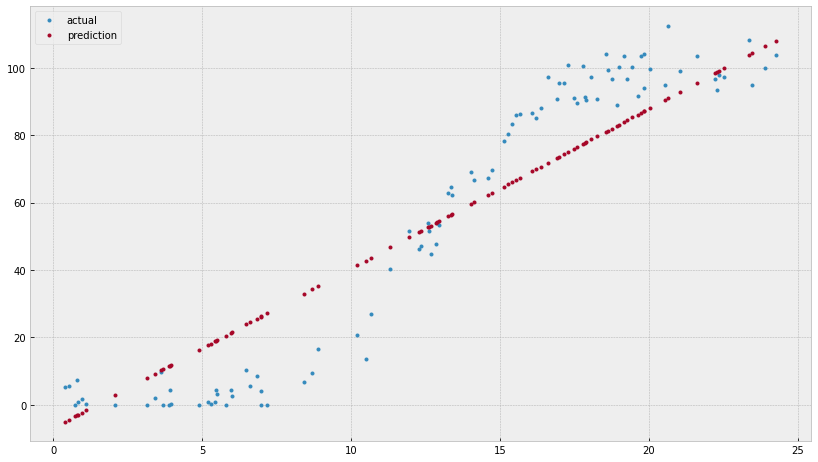

In [9]:
# visua;lising the effectiveness of the predictor using the test data set
plt.plot(x_test, y_test, '.', label='actual')
plt.plot(x_test, model.predict(x_test), '.', label='prediction')
plt.legend();

In [10]:
# Evaluate the neural network on the test data.
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 208.5720


208.57200622558594

<br>

While this straight line does seem to be the best linear approximation of the data, the linear prediction does not appear top be the best approach.

Instead, I will consider the addition of the sigmoid activation model to the layers of the neural network, to see if this reduces the output of the loss function.

<br>

In [11]:
# from topic 7 in the lectures [2]
model = kr.models.Sequential()
# using 2 sigmoid function layers, as well as 1 linear function layer
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="random_normal", bias_initializer="zeros"))
#model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="random_normal", bias_initializer="zeros"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="ones", bias_initializer="zeros"))
# compiling the the neural network model
model.compile('adam', loss='mean_squared_error')

In [12]:
# through trial and error, identified that 200 epochs is sufficient to bottom out the loss in this instance
model.fit(x_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
39/39 [==============================] - 1s 2ms/step - loss: 1951.1853
Epoch 2/200
39/39 [==============================] - 0s 2ms/step - loss: 1680.3540
Epoch 3/200
39/39 [==============================] - 0s 2ms/step - loss: 1471.0493
Epoch 4/200
39/39 [==============================] - 0s 2ms/step - loss: 1374.0290
Epoch 5/200
39/39 [==============================] - 0s 2ms/step - loss: 1253.5094
Epoch 6/200
39/39 [==============================] - 0s 2ms/step - loss: 1182.6870
Epoch 7/200
39/39 [==============================] - 0s 2ms/step - loss: 1171.0660
Epoch 8/200
39/39 [==============================] - 0s 2ms/step - loss: 1153.9767
Epoch 9/200
39/39 [==============================] - 0s 2ms/step - loss: 1131.6672
Epoch 10/200
39/39 [==============================] - 0s 2ms/step - loss: 1080.0585
Epoch 11/200
39/39 [==============================] - 0s 2ms/step - loss: 1097.1067
Epoch 12/200
39/39 [==============================] - 0s 2ms/step - loss: 1036.0619
E

39/39 [==============================] - 0s 1ms/step - loss: 159.9432
Epoch 100/200
39/39 [==============================] - 0s 2ms/step - loss: 160.2962
Epoch 101/200
39/39 [==============================] - 0s 1ms/step - loss: 168.0596
Epoch 102/200
39/39 [==============================] - 0s 1ms/step - loss: 145.5011
Epoch 103/200
39/39 [==============================] - 0s 1ms/step - loss: 137.0156
Epoch 104/200
39/39 [==============================] - 0s 1ms/step - loss: 145.2369
Epoch 105/200
39/39 [==============================] - 0s 1ms/step - loss: 144.1743
Epoch 106/200
39/39 [==============================] - 0s 1ms/step - loss: 137.1699
Epoch 107/200
39/39 [==============================] - 0s 1ms/step - loss: 132.0059
Epoch 108/200
39/39 [==============================] - 0s 2ms/step - loss: 134.8207
Epoch 109/200
39/39 [==============================] - 0s 1ms/step - loss: 135.1086
Epoch 110/200
39/39 [==============================] - 0s 1ms/step - loss: 125.6407
Epoch 

39/39 [==============================] - 0s 1ms/step - loss: 47.1726
Epoch 198/200
39/39 [==============================] - 0s 2ms/step - loss: 43.6532
Epoch 199/200
39/39 [==============================] - 0s 2ms/step - loss: 41.6561
Epoch 200/200
39/39 [==============================] - 0s 1ms/step - loss: 45.5370


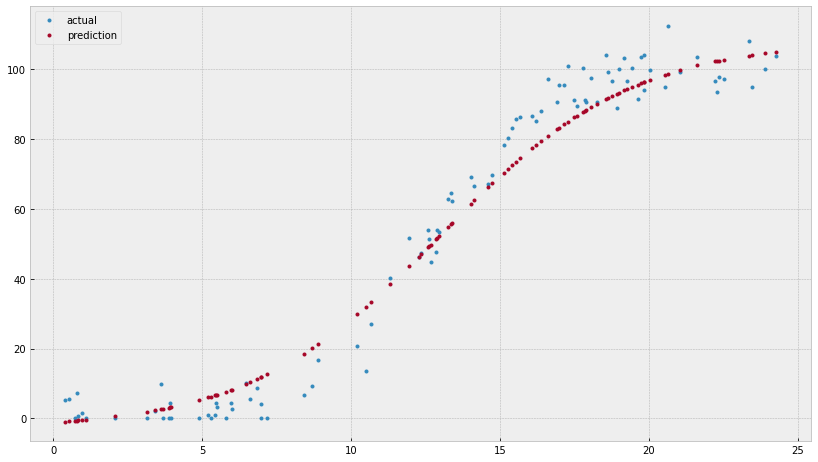

In [13]:
# visua;lising the effectiveness of the predictor using the test data set
plt.plot(x_test, y_test, '.', label='actual')
plt.plot(x_test, model.predict(x_test), '.', label='prediction')
plt.legend();

In [14]:
# Evaluate the neural network on the test data.
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 50.5938


50.593753814697266

<br>

Clearly the addition of the sigmoid function has greatly improved the prediction accuracy of the model, as shown by both the plot and the evaluation of the model again the test data set.

To see if this prediction can be immproved on, or if this is in fact the lowest result from the loss function that can be obtained from this dataset, I will investigate the results of adding another layer with a sigmoid function to the model.

<br>

In [15]:
# from topic 7 in the lectures [2]
model = kr.models.Sequential()
# using 2 sigmoid function layers, as well as 1 linear function layer
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="random_normal", bias_initializer="zeros"))
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="random_normal", bias_initializer="zeros"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="ones", bias_initializer="zeros"))
# compiling the the neural network model
model.compile('adam', loss='mean_squared_error')

In [16]:
model.fit(x_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
39/39 [==============================] - 1s 2ms/step - loss: 1859.7699
Epoch 2/200
39/39 [==============================] - 0s 2ms/step - loss: 1701.0555
Epoch 3/200
39/39 [==============================] - 0s 2ms/step - loss: 1642.0158
Epoch 4/200
39/39 [==============================] - 0s 2ms/step - loss: 1588.7735
Epoch 5/200
39/39 [==============================] - 0s 2ms/step - loss: 1490.4592
Epoch 6/200
39/39 [==============================] - 0s 2ms/step - loss: 1529.8096
Epoch 7/200
39/39 [==============================] - 0s 2ms/step - loss: 1473.9665
Epoch 8/200
39/39 [==============================] - 0s 2ms/step - loss: 1512.3757
Epoch 9/200
39/39 [==============================] - 0s 2ms/step - loss: 1466.5476
Epoch 10/200
39/39 [==============================] - 0s 2ms/step - loss: 1393.8604
Epoch 11/200
39/39 [==============================] - 0s 2ms/step - loss: 1304.4254
Epoch 12/200
39/39 [==============================] - 0s 2ms/step - loss: 1367.5200
E

39/39 [==============================] - 0s 2ms/step - loss: 17.5821
Epoch 101/200
39/39 [==============================] - 0s 2ms/step - loss: 17.8132
Epoch 102/200
39/39 [==============================] - 0s 2ms/step - loss: 17.5509
Epoch 103/200
39/39 [==============================] - 0s 2ms/step - loss: 17.9129
Epoch 104/200
39/39 [==============================] - 0s 2ms/step - loss: 17.9232
Epoch 105/200
39/39 [==============================] - 0s 2ms/step - loss: 17.1873
Epoch 106/200
39/39 [==============================] - 0s 2ms/step - loss: 17.1580
Epoch 107/200
39/39 [==============================] - 0s 2ms/step - loss: 16.7907
Epoch 108/200
39/39 [==============================] - 0s 2ms/step - loss: 17.3722
Epoch 109/200
39/39 [==============================] - 0s 2ms/step - loss: 18.4021
Epoch 110/200
39/39 [==============================] - 0s 2ms/step - loss: 16.9271
Epoch 111/200
39/39 [==============================] - 0s 2ms/step - loss: 17.4559
Epoch 112/200
39/3

39/39 [==============================] - 0s 2ms/step - loss: 14.4713
Epoch 199/200
39/39 [==============================] - 0s 2ms/step - loss: 18.9386
Epoch 200/200
39/39 [==============================] - 0s 2ms/step - loss: 17.5824


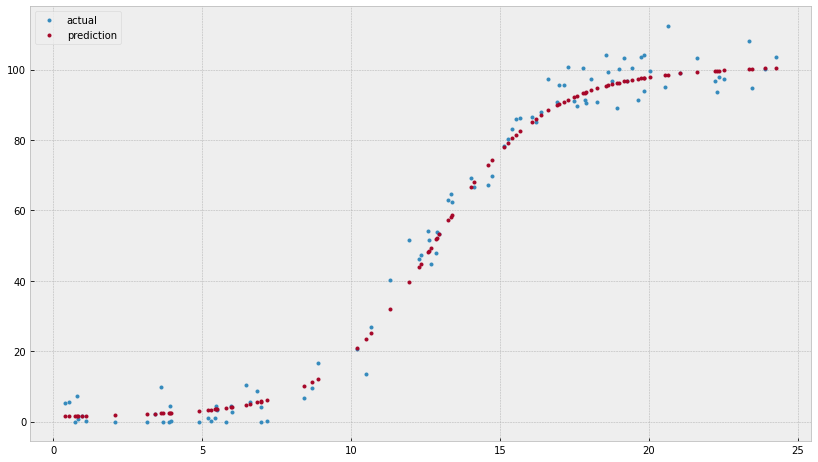

In [17]:
# visua;lising the effectiveness of the predictor using the test data set
plt.plot(x_test, y_test, '.', label='actual')
plt.plot(x_test, model.predict(x_test), '.', label='prediction')
plt.legend();

In [18]:
# Evaluate the neural network on the test data.
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 20.3253


20.3253231048584

<br>

By adding the second sigmoid function, the loss function has again reduced by over half when evaluated on the test data. Thus I will use this method to produce the prediction model for power production which will be deployed in the web service.

<br>

#### References

[1]Fundamentals of Data Analysis Project 2020; Dervla Candon; https://github.com/dervlac/FDA-Assessment/blob/main/FDA%20Project.ipynb

[2] Linear Regression in Keras; Ian McLoughlin; https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb

[3]

***

# End

***